# Project Report- Rain in Australia ☔️
Group 11: Amy Xiong, Shaochen Zhang, Hussein Al Aaref, Ratana Wang
## Introduction

The weather is so unpredictable. As Vancouverites, you never know what the weather will be like next week, or even the next day. It is often part of our typical routines to check the weather app for the next day- should I bring an umbrella today? Should I wear rainboots? Behind the answer to such a question involves the analysis of various weather variables to accurately predict incoming rainfall. Predictive rain models are generated using available historic data to train and teach the model on what has happened in a specific location (DTN Team, 2021).

In our project, we will explore the prediction of next-day rainfall as a boolean using classification based on a subset of predictor variables. The dataset we will be analyzing, titled ‘Rain in Australia,’ summarizes different aspects of the weather (temperatures, wind speeds, etc.) for a decade, which were recorded by various Australian weather stations.

To investigate the classification of next-day rainfall we formulate the simple yet relevant question: <b> Will it rain tomorrow based on the current state of the weather and past weather data? </b> 

In [1]:
install.packages("leaps")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
# load necessary packages
library(tidyverse)
library(tidymodels)
library(leaps)

# load data
url <- "https://drive.google.com/uc?export=download&id=1NKrFCoyZc8R1XoZ3Maz5AtSg5W4b2n9j"
rain <- read_csv(url)
glimpse(rain)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

Rows: 145,460
Columns: 23
$ Date          <date> 2008-12-01, 2008-12-02, 2008-12-03, 2008-12-04, 2008-12…
$ Location      <chr> "Albury", "Albury", "Albury", "Albury", "Albury", "Albur…
$ MinTemp       <dbl> 13.4, 7.4, 12.9, 9.2, 17.5, 14.6, 14.3, 7.7, 9.7, 13.1, …
$ MaxTemp       <dbl> 22.9, 25.1, 25.7, 28.0, 32.3, 29.7, 25.0, 26.7, 31.9, 30…
$ Rainfall      <dbl> 0.6, 0.0, 0.0, 0.0, 1.0, 0.2, 0.0, 0.0, 0.0, 1.4, 0.0, 2…
$ Evaporation   <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ Sunshine      <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ WindGustDir   <chr> "W", "WNW", "WSW", "NE", "W", "WNW", "W", "W", "NNW", "W…
$ WindGustSpeed <dbl> 44, 44, 46, 24, 41, 56, 50, 35, 80, 28, 30, 31, 61, 44, …
$ WindDir9am    <chr> "W", "NNW", "W", "SE", "ENE", "W", "SW", "SSE", "SE", "S…
$ WindDir3pm    <chr> "WNW", "WSW", "WSW", "E", "NW", "W", "W", "W", "NW", "SS…
$ WindSpeed9am  <dbl> 20, 4, 19, 11, 7, 19, 20, 6, 7, 15, 17, 15, 28, 24, 4, N…
$ WindSpeed3pm

The dataset is already tidy. We see that `RainTomorrow` is of type character, with 'Yes' indicating that it will rain tomorrow and 'No' indicating otherwise. Since we will be working with `RainTomorrow` as a categorical variable, we will convert it to a factor. Also, we will remove any rows where `RainTomorrow` is `NA`, as those observations are useless for our purposes.

In [3]:
# convert the character RainTomorrow variable to the factor data type
rain <- rain |>
    mutate(RainTomorrow = as_factor(RainTomorrow)) |>
    filter(!is.na(RainTomorrow))
glimpse(rain)

Rows: 142,193
Columns: 23
$ Date          <date> 2008-12-01, 2008-12-02, 2008-12-03, 2008-12-04, 2008-12…
$ Location      <chr> "Albury", "Albury", "Albury", "Albury", "Albury", "Albur…
$ MinTemp       <dbl> 13.4, 7.4, 12.9, 9.2, 17.5, 14.6, 14.3, 7.7, 9.7, 13.1, …
$ MaxTemp       <dbl> 22.9, 25.1, 25.7, 28.0, 32.3, 29.7, 25.0, 26.7, 31.9, 30…
$ Rainfall      <dbl> 0.6, 0.0, 0.0, 0.0, 1.0, 0.2, 0.0, 0.0, 0.0, 1.4, 0.0, 2…
$ Evaporation   <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ Sunshine      <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ WindGustDir   <chr> "W", "WNW", "WSW", "NE", "W", "WNW", "W", "W", "NNW", "W…
$ WindGustSpeed <dbl> 44, 44, 46, 24, 41, 56, 50, 35, 80, 28, 30, 31, 61, 44, …
$ WindDir9am    <chr> "W", "NNW", "W", "SE", "ENE", "W", "SW", "SSE", "SE", "S…
$ WindDir3pm    <chr> "WNW", "WSW", "WSW", "E", "NW", "W", "W", "W", "NW", "SS…
$ WindSpeed9am  <dbl> 20, 4, 19, 11, 7, 19, 20, 6, 7, 15, 17, 15, 28, 24, NA, …
$ WindSpeed3pm

Weather conditions can often be quite drastic in different regions, even if they are part of the same country. Subsequently, we focus on one arbitrarily chosen weather station location (Albury). This is because the entirety of Australia is too large of a region to analyze- doing so may result in a inaccurate and overgeneralized classifier model. 

In [4]:
rain_albury <- rain |>
  filter(Location == "Albury") 
head(rain_albury)

Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,⋯,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
2008-12-01,Albury,13.4,22.9,0.6,NA,NA,W,44,W,⋯,71,22,1007.7,1007.1,8,NA,16.9,21.8,No,No
2008-12-02,Albury,7.4,25.1,0.0,NA,NA,WNW,44,NNW,⋯,44,25,1010.6,1007.8,NA,NA,17.2,24.3,No,No
2008-12-03,Albury,12.9,25.7,0.0,NA,NA,WSW,46,W,⋯,38,30,1007.6,1008.7,NA,2,21.0,23.2,No,No
2008-12-04,Albury,9.2,28.0,0.0,NA,NA,NE,24,SE,⋯,45,16,1017.6,1012.8,NA,NA,18.1,26.5,No,No
2008-12-05,Albury,17.5,32.3,1.0,NA,NA,W,41,ENE,⋯,82,33,1010.8,1006.0,7,8,17.8,29.7,No,No
2008-12-06,Albury,14.6,29.7,0.2,NA,NA,WNW,56,W,⋯,55,23,1009.2,1005.4,NA,NA,20.6,28.9,No,No


## Preliminary Exploratory Data Analysis

#### Step 1. Picking the best subset of predictor variables

First, we pick the best subset of predictor variables, which we will use to build our classification model. The quantitative (i.e., possible predictor) variables are: \
`MinTemp` = minimum temperature (°C) \
`MaxTemp` = maximum temperature (°C) \
`Rainfall` = amount of rainfall (mm) \
`Evaporation` = Class A Evaporation Pan (mm) until 9am \
`Sunshine` = amount of sunshine (hours) \
`WindGustSpeed` = strongest wind gust speed (km/h) until 12am \
`WindSpeed9am` = average wind speed (km/hr) until 9am \
`WindSpeed3pm` = average wind speed (km/hr) until 3pm \
`Humidity9am` = humidity (%) at 9am \
`Humidity3pm` = humidity (%) at 3pm \
`Pressure9am` = mean sea level atmospheric pressure (hpa) at 9am \
`Pressure3pm` = mean sea level atmospheric pressure (hpa) at 3pm \
`Cloud9am` = cloud coverage (oktas) at 9am \
`Cloud3pm` = cloud coverage (oktas) at 3pm \
`Temp9am` = temperature (°C) at 9am \
`Temp3pm` = temperature (°C) at 3pm 

We will select only the useful columns; thus, we will remove the columns for which a large percentage of rows are `NA`.

In [5]:
# count the total number of rows in rain_albury
n <- nrow(rain_albury)
quantitative_vars <- rain_albury |>
    select(-Date, -Location, -WindGustDir, -WindDir9am, -WindDir3pm, -RainToday, -RainTomorrow)

quantitative_vars |>
    summarise_all(~ round(sum(is.na(.))/n, 3))

MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.002,0,0.007,1,1,0.003,0.001,0.002,0.001,0.001,0,0.001,0.574,0.53,0.001,0.001


We see that the `Evaporation` and `Sunshine` columns are *all* `NA`, and `Cloud9am` and `Cloud3pm` are mostly `NA`. Also, `MinTemp` and `MaxTemp` represent extrema (thus possibly outlier) values. We will remove all six of these from consideration. 

In [6]:
quantitative_vars <- quantitative_vars |>
    select(-Evaporation, -Sunshine, -Cloud9am, -Cloud3pm, -MinTemp, -MaxTemp)

Based on our research, we have concluded that pressure and temperature are especially important predictor variables for rainfall. As such, we decide that we will definitely include `Pressure9am`, `Pressure3pm`, `Temp9am`, and `Temp3pm` (Barrira-Animas et al., 2022). Therefore, we will remove these four predictor variables from our candidate pool. 

In [7]:
quantitative_vars <- quantitative_vars |>
    select(-Pressure9am, -Pressure3pm, -Temp9am, -Temp3pm)

We will perform forward selection on the remaining quantative variables to determine which ones are relevant for our prediction. The following code is based on the [code from the STHDA](http://www.sthda.com/english/articles/37-model-selection-essentials-in-r/155-best-subsets-regression-essentials-in-r/), and uses the `regsubsets` function from the `leaps` library.

In [8]:
# perform forward selection of variables
names <- colnames(quantitative_vars)
potential_predictors <- bind_cols(rain_albury |> select(RainTomorrow), quantitative_vars)

forward = regsubsets(RainTomorrow ~ ., data = potential_predictors, nvmax = length(names), method = "forward")
summary(forward)

Subset selection object
Call: regsubsets.formula(RainTomorrow ~ ., data = potential_predictors, 
    nvmax = length(names), method = "forward")
6 Variables  (and intercept)
              Forced in Forced out
Rainfall          FALSE      FALSE
WindGustSpeed     FALSE      FALSE
WindSpeed9am      FALSE      FALSE
WindSpeed3pm      FALSE      FALSE
Humidity9am       FALSE      FALSE
Humidity3pm       FALSE      FALSE
1 subsets of each size up to 6
Selection Algorithm: forward
         Rainfall WindGustSpeed WindSpeed9am WindSpeed3pm Humidity9am
1  ( 1 ) " "      " "           " "          " "          " "        
2  ( 1 ) " "      "*"           " "          " "          " "        
3  ( 1 ) " "      "*"           " "          " "          "*"        
4  ( 1 ) " "      "*"           "*"          " "          "*"        
5  ( 1 ) "*"      "*"           "*"          " "          "*"        
6  ( 1 ) "*"      "*"           "*"          "*"          "*"        
         Humidity3pm
1  ( 1 ) "*

We will include two of these six potential variables in our final model, in addition to the four that we had previously chosen. Based on our forward selection results from above, it appears that the best two-variable model contains the predictors `WindGustSpeed` and `Humidity3pm`, so we will choose these. Our final training/testing set, `rain_set` is as follows:

In [9]:
rain_set <- rain_albury |>
    select(RainTomorrow, Pressure9am, Pressure3pm, Temp9am, Temp3pm, WindGustSpeed, Humidity3pm)
head(rain_set)

RainTomorrow,Pressure9am,Pressure3pm,Temp9am,Temp3pm,WindGustSpeed,Humidity3pm
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
No,1007.7,1007.1,16.9,21.8,44,22
No,1010.6,1007.8,17.2,24.3,44,25
No,1007.6,1008.7,21.0,23.2,46,30
No,1017.6,1012.8,18.1,26.5,24,16
No,1010.8,1006.0,17.8,29.7,41,33
No,1009.2,1005.4,20.6,28.9,56,23


#### Step 2. Summarizing the data

Now, we split `rain_set` such that 75% ends up in the training set, which is used to fit the model parameters, and 25% ends up in the test set, which we will later use to evaluate the best model. 

In [10]:
# set the seed
set.seed(1)
rain_set <- na.omit(rain_set)

# split the data into a training and testing set
rain_split <- initial_split(rain_set, prop = 0.75, strata = RainTomorrow)
rain_train <- training(rain_split)
rain_test <- testing(rain_split)

From `rain_train`, we will report the Yes/No counts for `RainTomorrow`.

In [11]:
yes_no_counts <- rain_train |>
    group_by(RainTomorrow) |>
    summarize(counts = n())
yes_no_counts

RainTomorrow,counts
<fct>,<int>
No,1788
Yes,459


Since the `initial_split` function splits the dataset in a way such that the training and testing subsets are equally proportioned, we can examine the training subset to find the accuracy of the majority classifier. The majority classifier plays an important role in giving us a sense of scale when considering accuracies. Additionally, we care about the accuracy of the majority classifier since it guesses the majority class label from the training data, regardless of values of predictor variables.

In [12]:
# calculate the majority classifier accuracy
maj_accuracy <- 1788 / (1788 + 459)
maj_accuracy

[1] 0.7957276

As we can see, the accuracy of the majority classifier is approximately 80%. Thus, our objective is to tune a value of $k$ that will achieve optimal performance that will yield a higher accuracy than the accuracy we have just calculated.

As a final part of our preliminary data exploration, we calculate the means of our predictor variables. This will give us a better sense of what most of the values in our dataset look like.

In [13]:
#calculate the predictor average
predictor_avg <- rain_train |>
    select(-RainTomorrow) |>
    summarise_all(~ mean(., na.rm = TRUE))
predictor_avg

Pressure9am,Pressure3pm,Temp9am,Temp3pm,WindGustSpeed,Humidity3pm
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1018.334,1015.765,14.31437,21.33983,32.97107,47.82911


#### Step 3. Visualizing the data

As a preliminary visualization, we will pick 2 of our predictor variables (Temperature and Pressure at 3pm) at random, as we are unable to plot 2-D graphs with more than 2 predictor variables. 

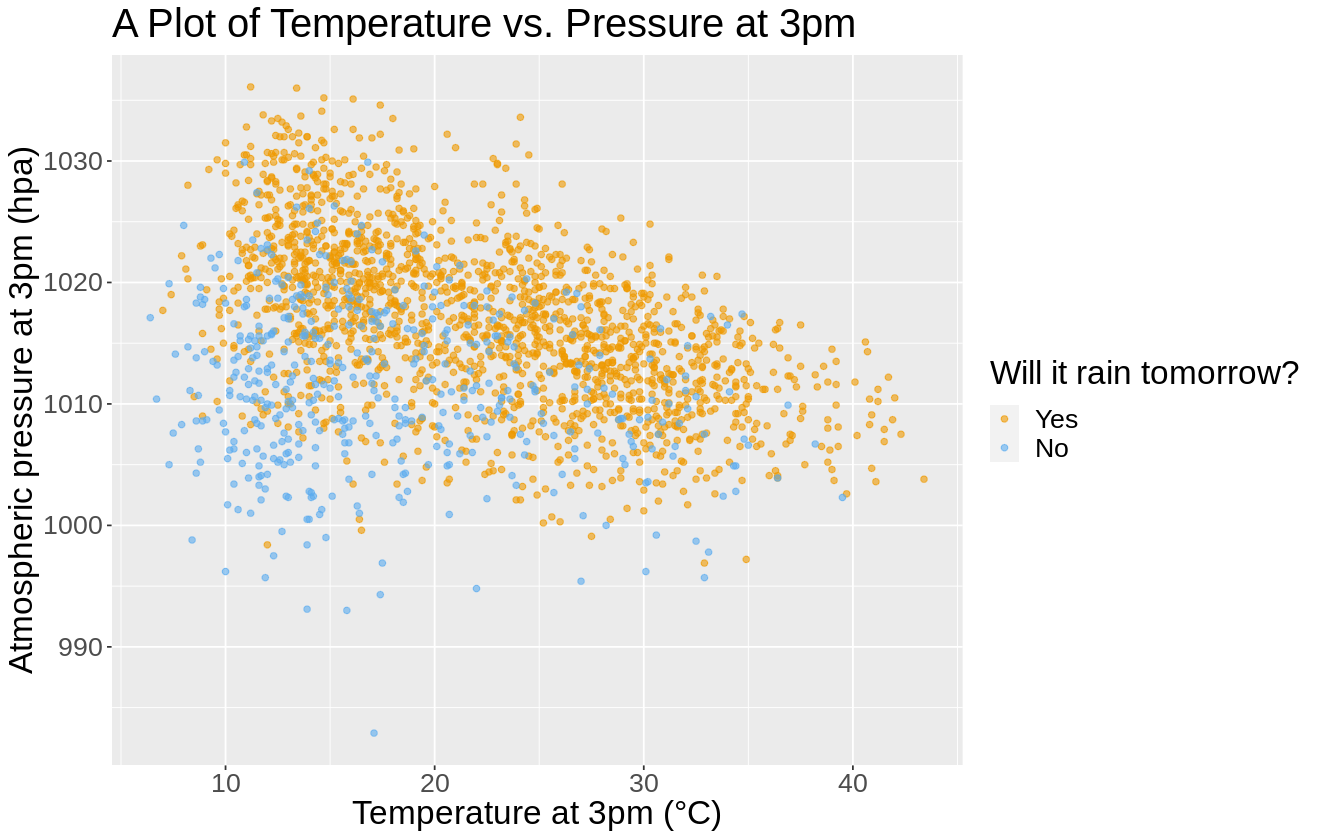

In [14]:
options(repr.plot.width = 11, repr.plot.height = 7)
# create scatter plot of temperature versus pressure,
# labeling the points be rain tomorrow class
rain_prelim <- rain_train |>
  ggplot(aes(x = Temp3pm, y = Pressure3pm, color = RainTomorrow)) +
  geom_point(alpha = 0.6) +
  labs(x = "Temperature at 3pm (°C)", 
       y = "Atmospheric pressure at 3pm (hpa)",
       color = "Will it rain tomorrow?") +
  scale_color_manual(labels = c("Yes", "No"), 
                     values = c("orange2", "steelblue2")) +
  theme(text = element_text(size = 20)) +
  ggtitle("A Plot of Temperature vs. Pressure at 3pm")
rain_prelim

We can see that positive next-day rain observations typically fall in the upper right-hand side of our plot and that negative next-day rain observations typically fall in the lower left-hand corner. In other words, at lower temperature and pressure, there tends to be no next-day rainfall, whereas higher temperature and pressure correlate with yes next-day rainfall. 

## Methods

To predict next-day rainfall in Albury, Australia, we have selected six predictor variables using external research and forward selection, and we will use the K-nearest neighbours classification model. 

To create a classification model with the highest possible accuracy, we will tune our value of `k` with cross-validation, visualize the accuracy of our potential models against different values of `k`, and choose the `k` for which accuracy is maximized. Then, we will find new observations and run them through our model, reporting whether it will rain the next day via a bar graph. We may choose to create additional models, using any 2 of the 6 predictor variables, and create plots (such as the one above) that visually indicate the results of the K-nearest neighbours algorithm. 

## Classification with K-nearest neighbors

#### Step 1: Finding the best value of $k$ using cross-validation

In [15]:
set.seed(1)
rain_vfold <- vfold_cv(rain_train, v = 5, strata = RainTomorrow)

rain_recipe <- recipe(RainTomorrow ~ ., data = rain_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 30, by = 1))

knn_results <- workflow() |>
    add_recipe(rain_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = rain_vfold, grid = k_vals) |>
    collect_metrics()

accuracies <- knn_results |>
    filter(.metric == "accuracy")

head(accuracies)

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.8237611,5,0.001995252,Preprocessor1_Model01
2,accuracy,binary,0.8237611,5,0.001995252,Preprocessor1_Model02
3,accuracy,binary,0.8526976,5,0.004135392,Preprocessor1_Model03
4,accuracy,binary,0.8526976,5,0.004135392,Preprocessor1_Model04
5,accuracy,binary,0.8629446,5,0.004850552,Preprocessor1_Model05
6,accuracy,binary,0.8629446,5,0.004850552,Preprocessor1_Model06


Now, we can plot our accuracy values against their respective $k$ values to figure out which $k$ leads to the highest classifier accuracy:

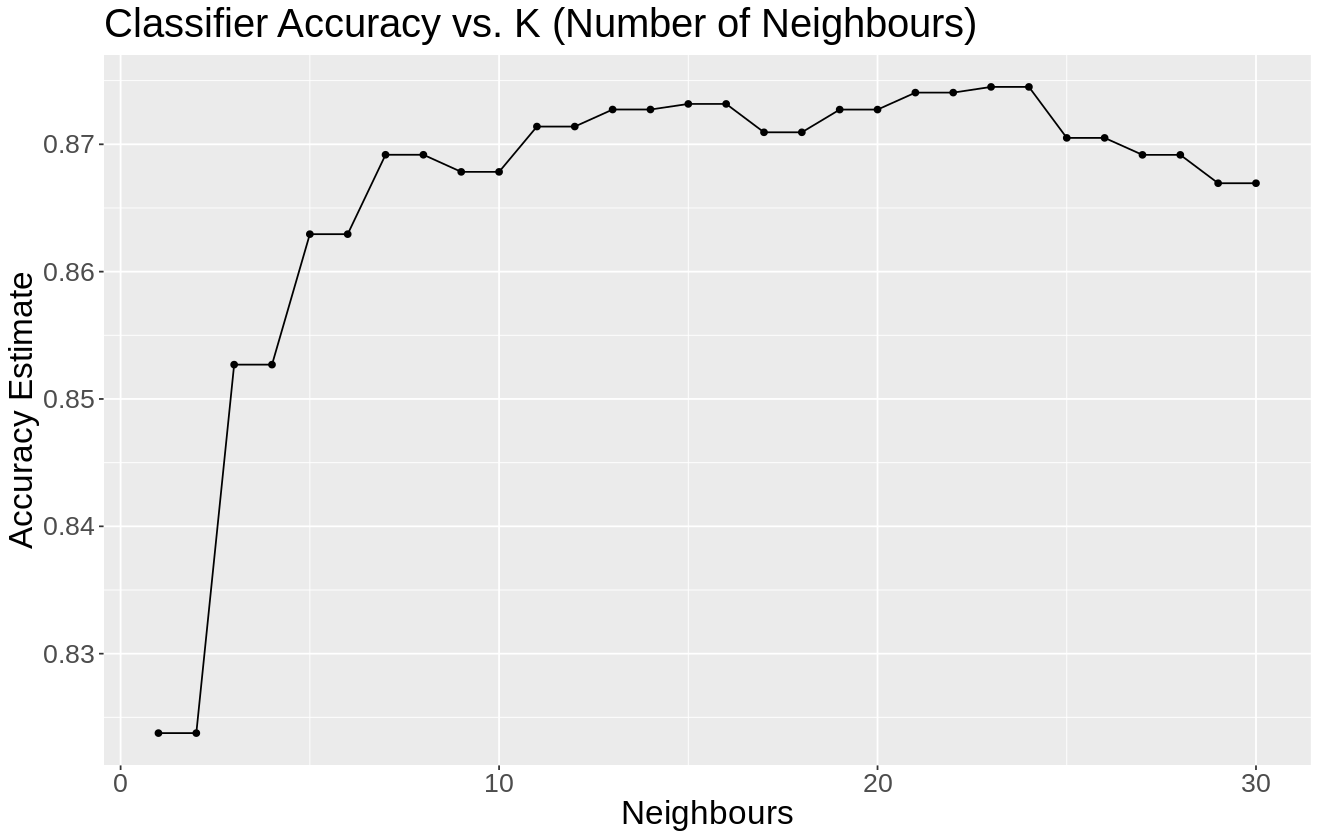

In [16]:
accuracy_vs_k <- accuracies |>
    ggplot(aes(x = neighbors, y = mean)) +
        geom_point() +
        geom_line() +
        labs(x = "Neighbours", y = "Accuracy Estimate") +
        ggtitle("Classifier Accuracy vs. K (Number of Neighbours)") +
        theme(text = element_text(size = 20))

accuracy_vs_k

From the graph, we see that the best value of $k$ (which yields the highest estimated accuracy) is approximately 23, which we can confirm using code:

In [17]:
# selecting the best k value
best_k <- accuracies |>
    filter(mean == max(mean)) |>
    pull(neighbors)
best_k

[1] 23 24

Thus, we will proceed with our K-NN classification using $k = 23$ (which was arbitrarily chosen over 24). 

In [18]:
best_k <- 23

#### Step 2: Training the Classifier with our Best K

In [19]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
    set_engine("kknn") |>
    set_mode("classification")

knn_fit <- workflow() |>
    add_recipe(rain_recipe) |>
    add_model(knn_spec) |>
    fit(data = rain_train)

rain_test_predictions <- predict(knn_fit, rain_test) |>
    bind_cols(rain_test)

accuracy <- rain_test_predictions |>
    metrics(truth = RainTomorrow, estimate = .pred_class) |>
    filter(.metric == "accuracy") |>
    pull(.estimate)
accuracy

confusion <- rain_test_predictions |>
    conf_mat(truth = RainTomorrow, estimate = .pred_class)
confusion

[1] 0.8626667

          Truth
Prediction  No Yes
       No  575  82
       Yes  21  72

We can see that our classifier has a predicted accuracy of about 86%, which is an improvement from the accuracy of the majority classifier (~80%) that we found earlier. This implies that the predictor variables are contributing to our classification in a meaningful manner - by taking into account the predictor variable values, we are able to classify our observations with more accuracy.

The confusion matrix also shows the majority of values along the top-left-to-bottom-right diagonal, which implies that most observations are being classified correctly.

#### Step 3: Performing K-NN Classification on New Observations

We will produce some new observations (i.e., arguments for our predictor variable parameters) for the sake of seeing our K-NN classifier in action. 

In [20]:
new_obs <- tibble(Pressure9am = c(1006.5, 1020.8, 1012.3),
                  Pressure3pm = c(1010.7, 1026.5, 1010.5),
                  Temp9am = c(20.0, 6.6, 17.1),
                  Temp3pm = c(25.4, 10.2, 18.2),
                  WindGustSpeed = c(45, 17, 21),
                  Humidity3pm = c(23, 82, 81))
prediction <- predict(knn_fit, new_obs)
prediction

.pred_class
<fct>
No
No
Yes


As we can see from the predicted class tibble above, our 3 new observations (which have different values for each of our six predictor variables) are classified such that the first two predict no rain tomorrow, and the last predicts yes rain tomorrow. 

For example, our first observation has `Pressure9am` = 1006.5, `Pressure3pm` = 1010.7, `Temp9am` = 20.0, `Temp3pm` = 25.4, `WindGustSpeed` = 45, and `Humidity3pm` = 23. The predicted value for `RainTomorrow` (as predicted by our K-NN classifier) is "No". 

#### Step 4. Visualizing our Classification

As mentioned above, it is difficult for us to see the effects of all six predictor variables at once. Thus, we will plot (6 choose 2) = 15 different graphs for our `rain_train` subset, each of which plots the observations using 2 predictor variables and coloured by their `RainTomorrow` classification. 

In [23]:
options(repr.plot.width = 5, repr.plot.height = 4)
plot1 <- rain_train |>
    ggplot(aes(x = Pressure9am, y = Pressure3pm, color = RainTomorrow)) +
        geom_point(alpha = 0.5) +
        labs(x = "Pressure @9am (hpa)", y = "Pressure @3pm (hpa)", color = "Will it Rain Tomorrow?") +
        ggtitle("Pressure @3pm vs. Pressure @9am")
plot2 <- rain_train |>
    ggplot(aes(x = Pressure9am, y = Temp9am, color = RainTomorrow)) +
        geom_point(alpha = 0.5) +
        labs(x = "Pressure @9am (hpa)", y = "Temp @9am (°C)", color = "Will it Rain Tomorrow?") +
        ggtitle("Temp @9am (°C) vs. Pressure @9am")
plot3 <- rain_train |>
    ggplot(aes(x = Pressure9am, y = Temp3pm, color = RainTomorrow)) +
        geom_point(alpha = 0.5) +
        labs(x = "Pressure @9am (hpa)", y = "Temp @3pm (°C)", color = "Will it Rain Tomorrow?") +
        ggtitle("Temp @3pm (°C) vs. Pressure @9am")
plot4 <- rain_train |>
    ggplot(aes(x = Pressure9am, y = WindGustSpeed, color = RainTomorrow)) +
        geom_point(alpha = 0.5) +
        labs(x = "Pressure @9am (hpa)", y = "Wind Gust Speed (km/h)", color = "Will it Rain Tomorrow?") +
        ggtitle("Wind Gust Speed (km/h) vs. Pressure @9am")
plot5 <- rain_train |>
    ggplot(aes(x = Pressure9am, y = Humidity3pm, color = RainTomorrow)) +
        geom_point(alpha = 0.5) +
        labs(x = "Pressure @9am (hpa)", y = "Humidity @3pm (%)", color = "Will it Rain Tomorrow?") +
        ggtitle("Humidity @3pm (%) vs. Pressure @9am")
plot6 <- rain_train |>
    ggplot(aes(x = Pressure3pm, y = Temp9am, color = RainTomorrow)) +
        geom_point(alpha = 0.5) +
        labs(x = "Pressure @3pm (hpa)", y = "Temp @9am (°C)", color = "Will it Rain Tomorrow?") +
        ggtitle("Temp @9am (°C) vs. Pressure @3pm")
plot7 <- rain_train |>
    ggplot(aes(x = Pressure3pm, y = Temp3pm, color = RainTomorrow)) +
        geom_point(alpha = 0.5) +
        labs(x = "Pressure @3pm (hpa)", y = "Temp @3pm (°C)", color = "Will it Rain Tomorrow?") +
        ggtitle("Temp @3pm (°C) vs. Pressure @3pm")
plot8 <- rain_train |>
    ggplot(aes(x = Pressure3pm, y = WindGustSpeed, color = RainTomorrow)) +
        geom_point(alpha = 0.5) +
        labs(x = "Pressure @3pm (hpa)", y = "Wind Gust Speed (km/h)", color = "Will it Rain Tomorrow?") +
        ggtitle("Wind Gust Speed (km/h) vs. Pressure @3pm")
plot9 <- rain_train |>
    ggplot(aes(x = Pressure3pm, y = Humidity3pm, color = RainTomorrow)) +
        geom_point(alpha = 0.5) +
        labs(x = "Pressure @3pm (hpa)", y = "Humidity @3pm (%)", color = "Will it Rain Tomorrow?") +
        ggtitle("Humidity @3pm (%) vs. Pressure @3pm")
plot10 <- rain_train |>
    ggplot(aes(x = Temp9am, y = Temp3pm, color = RainTomorrow)) +
        geom_point(alpha = 0.5) +
        labs(x = "Temp @9am (°C)", y = "Temp @3pm (°C)", color = "Will it Rain Tomorrow?") +
        ggtitle("Temp @3pm (°C) vs. Temp @9am (°C)")
plot11 <- rain_train |>
    ggplot(aes(x = Temp9am, y = WindGustSpeed, color = RainTomorrow)) +
        geom_point(alpha = 0.5) +
        labs(x = "Temp @9am (°C)", y = "Wind Gust Speed (km/h)", color = "Will it Rain Tomorrow?") +
        ggtitle("Wind Gust Speed (km/h) vs. Temp @9am (°C)")
plot12 <- rain_train |>
    ggplot(aes(x = Temp9am, y = Humidity3pm, color = RainTomorrow)) +
        geom_point(alpha = 0.5) +
        labs(x = "Temp @9am (°C)", y = "Humidity @3pm (%)", color = "Will it Rain Tomorrow?") +
        ggtitle("Humidity @3pm (%) vs. Temp @9am (°C)")
plot13 <- rain_train |>
    ggplot(aes(x = Temp3pm, y = WindGustSpeed, color = RainTomorrow)) +
        geom_point(alpha = 0.5) +
        labs(x = "Temp @3pm (°C)", y = "Wind Gust Speed (km/h)", color = "Will it Rain Tomorrow?") +
        ggtitle("Wind Gust Speed (km/h) vs. Temp @3pm (°C)")
plot14 <- rain_train |>
    ggplot(aes(x = Temp3pm, y = Humidity3pm, color = RainTomorrow)) +
        geom_point(alpha = 0.5) +
        labs(x = "Temp @3pm (°C)", y = "Humidity @3pm (%)", color = "Will it Rain Tomorrow?") +
        ggtitle("Humidity @3pm (%) vs. Temp @3pm (°C)")
plot15 <- rain_train |>
    ggplot(aes(x = WindGustSpeed, y = Humidity3pm, color = RainTomorrow)) +
        geom_point(alpha = 0.5) +
        labs(x = "Wind Gust Speed (km/h)", y = "Humidity @3pm (%)", color = "Will it Rain Tomorrow?") +
        ggtitle("Humidity @3pm (%) vs. Wind Gust Speed (km/h)")

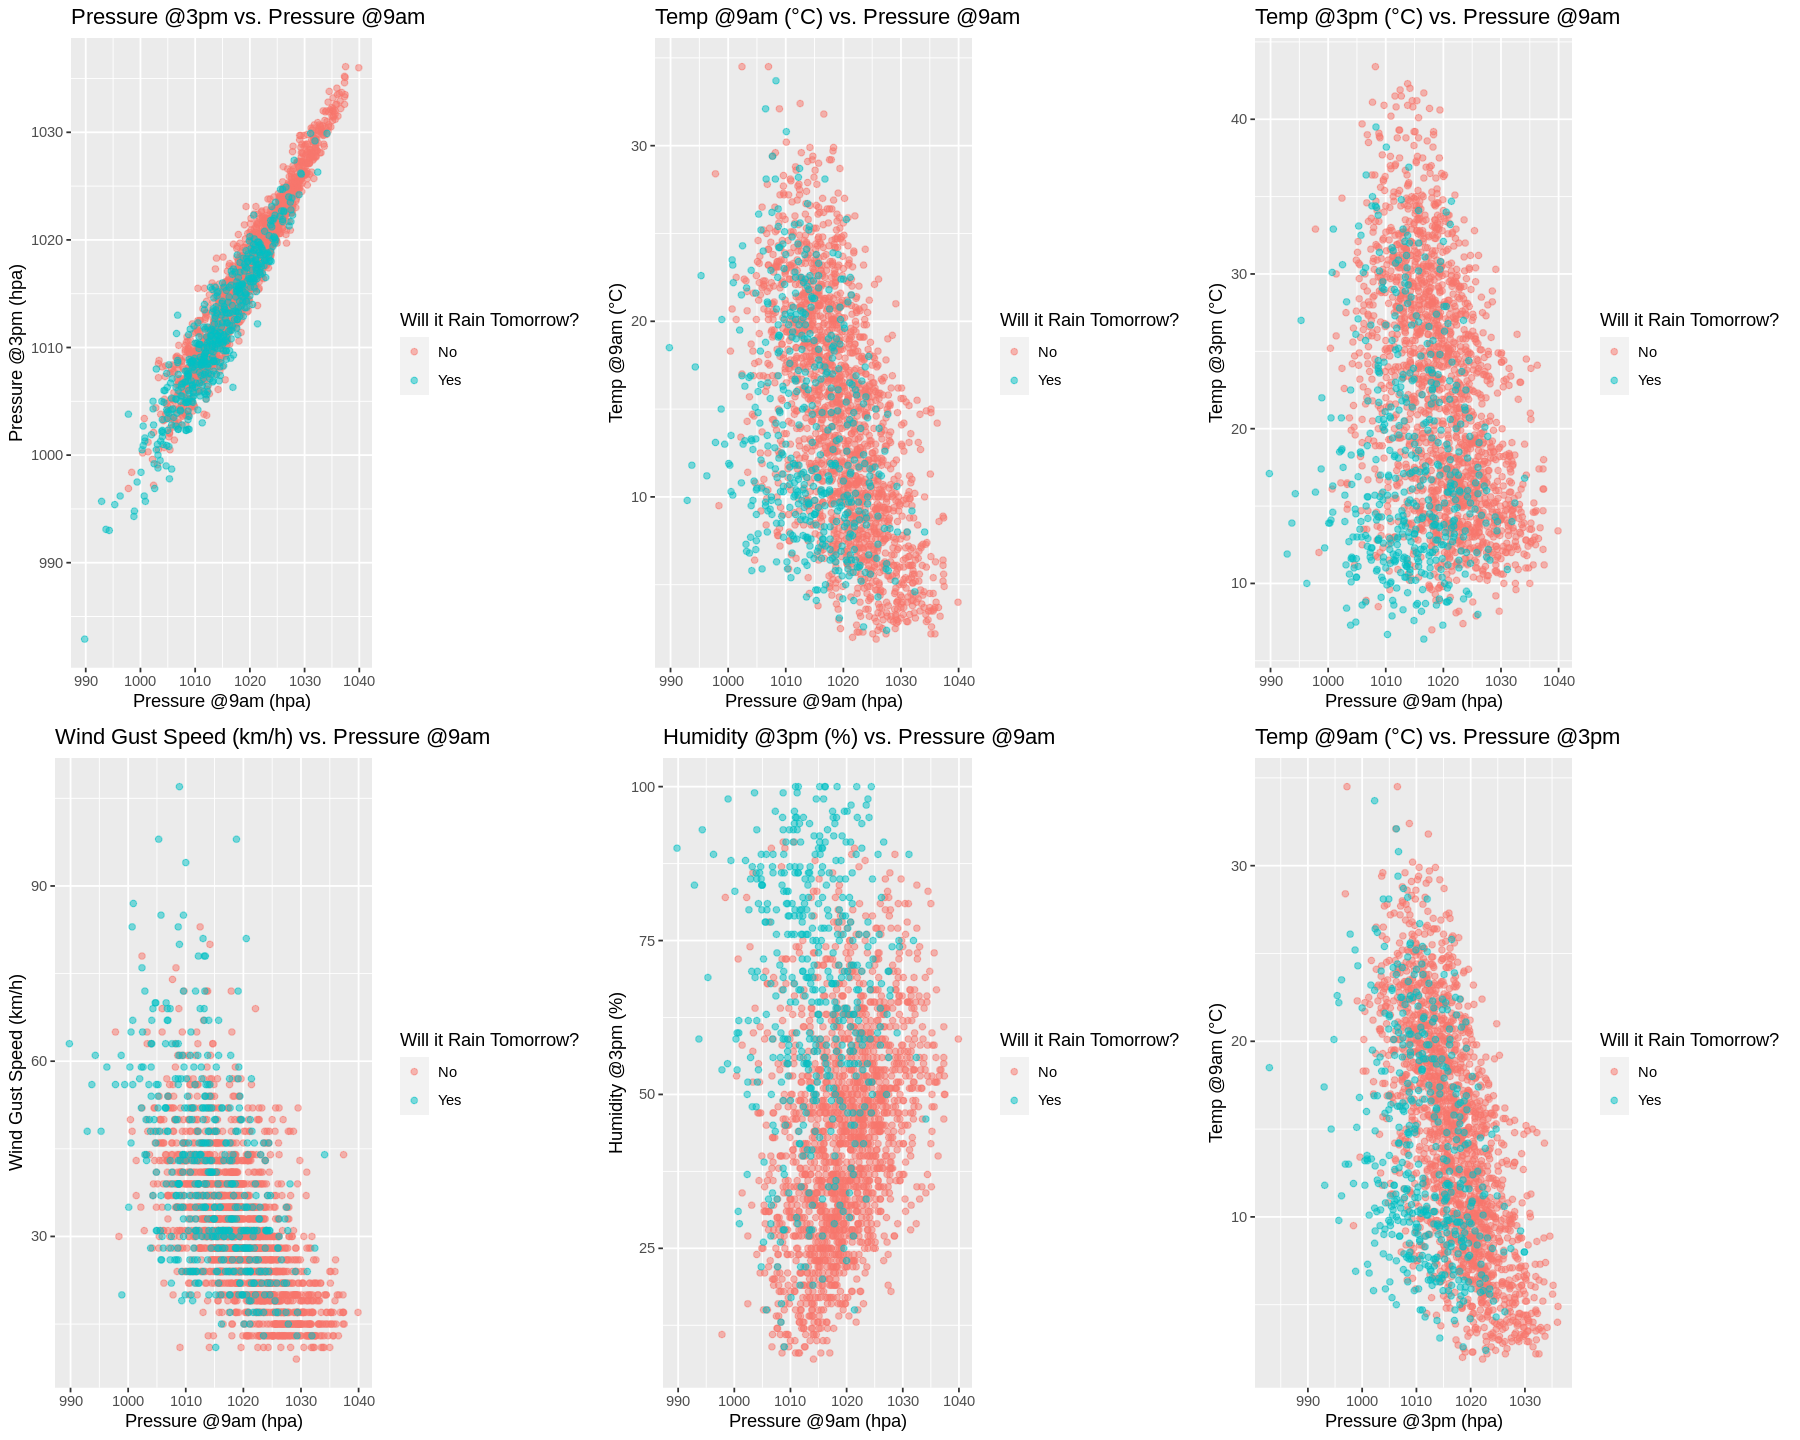

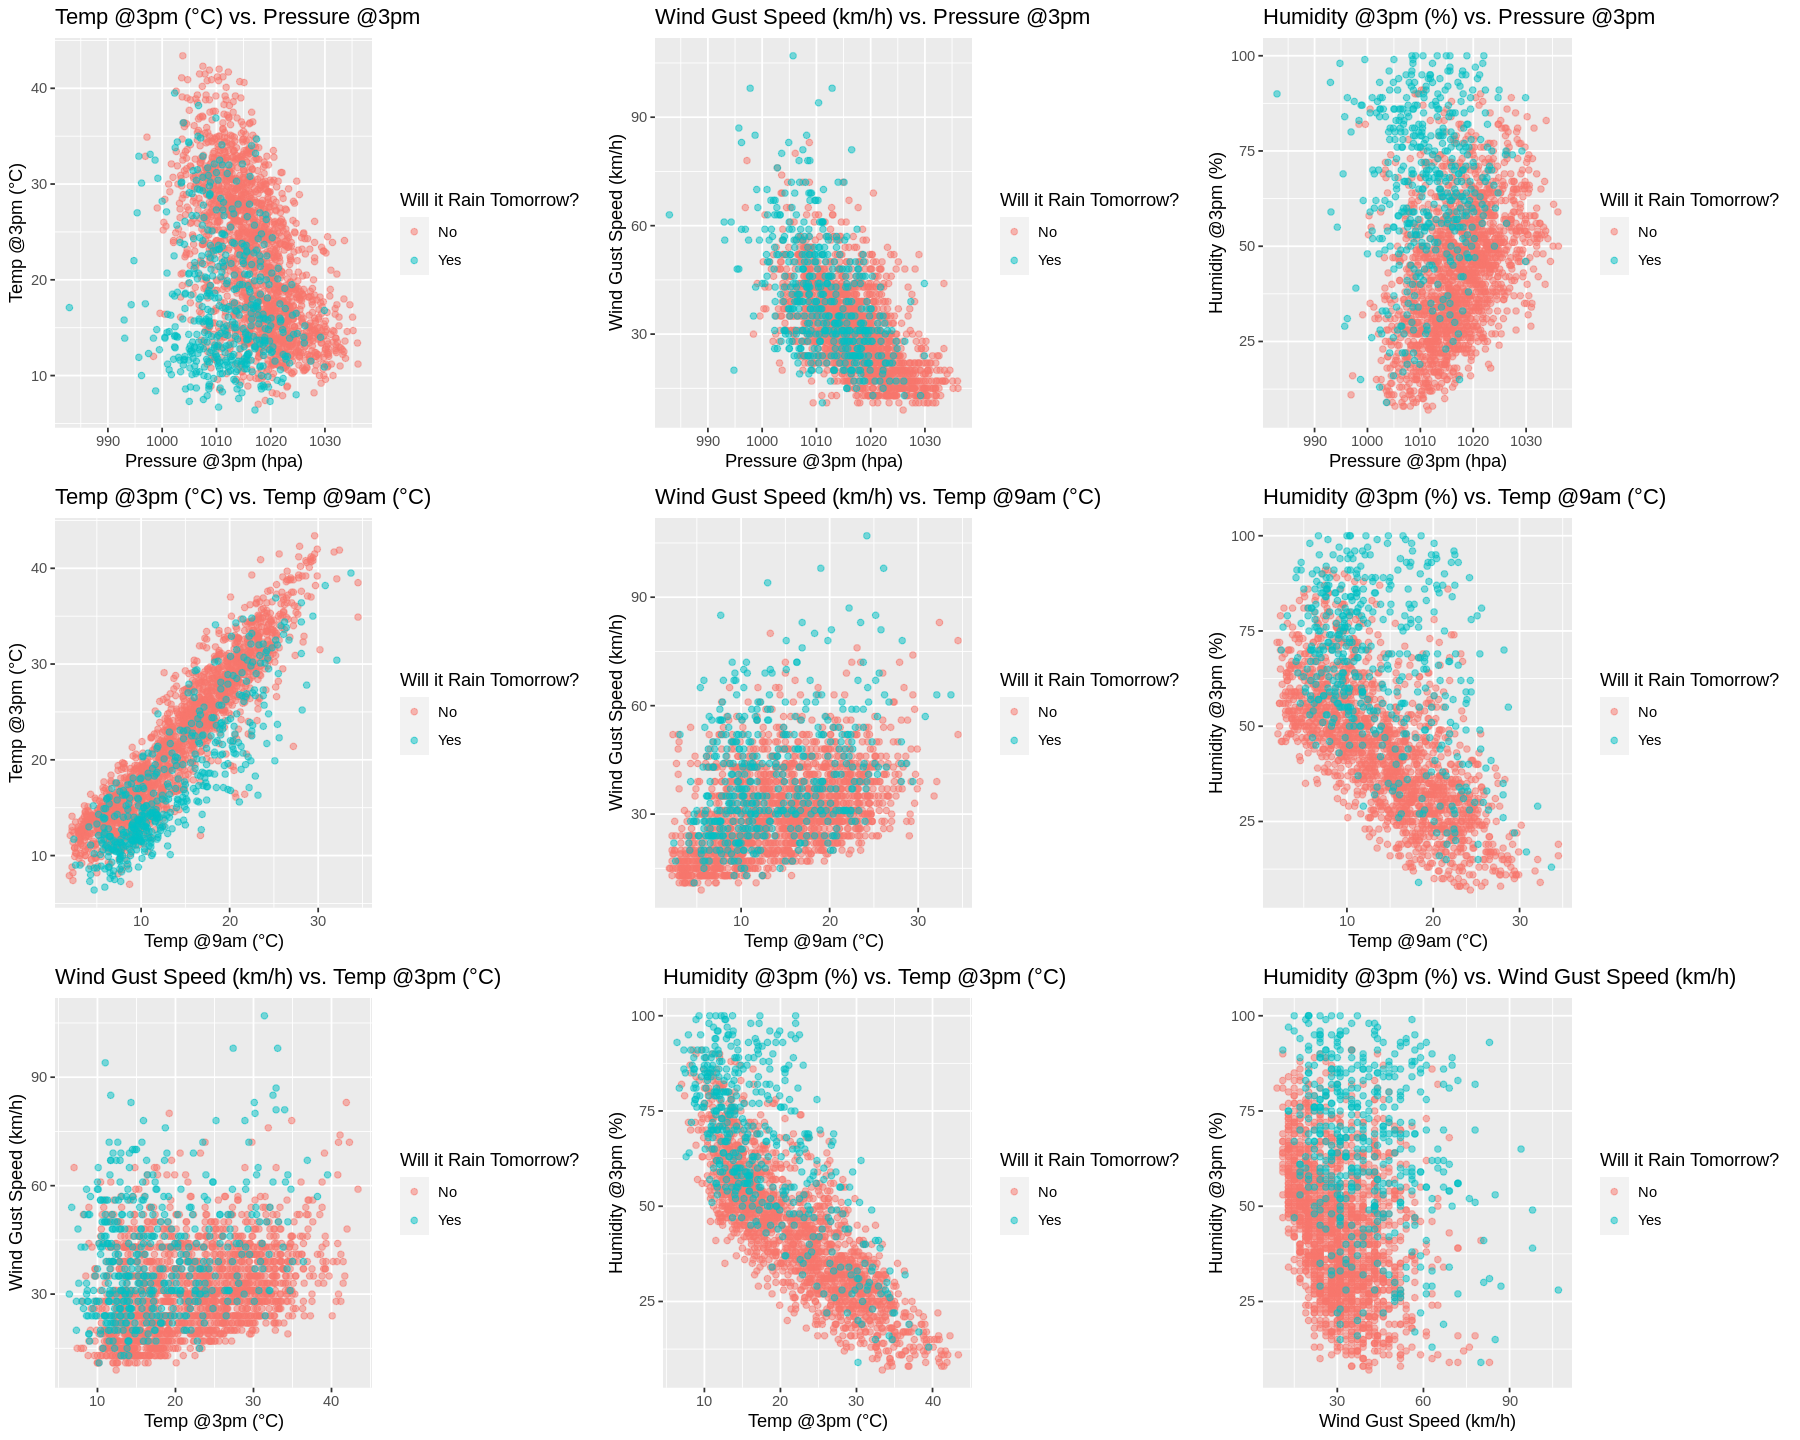

In [24]:
library(cowplot)
options(repr.plot.width = 15, repr.plot.height = 12)

plot_grid(plot1, plot2, plot3, plot4, plot5, plot6)
plot_grid(plot7, plot8, plot9, plot10, plot11, plot12, plot13, plot14, plot15)

These graphs are useful in that we can try to visually/manually predict a new observation's value for `RainTomorrow` based on any two of the six predictor variables we defined earlier. 

## Results & Discussion

We found a way to predict the classification (yes/no) for next-day rainfall in Albury, Australia, given new observations that have values for our six predictor variables: `Pressure9am`, `Pressure3pm`, `Temp9am`, `Temp3pm`, `WindGustSpeed`, and `Humidity3pm`.

We first derived the best value of k (the one that yielded the highest predicted classifier accuracy, which was 23) using 5-fold cross-validation. Our K-NN classifier then used this value of k to train on the `rain_train` subset. Finally, we tested the classifier against our `rain_test` dataset, and **found an estimated prediction accuracy of about 86%**, which was an improvement upon the accuracy of our majority classifier (~80%). 

However, we notice that there is definitely room for improvement, as our confusion matrix demonstrated a substantial number of observations being misdiagnosed; specifically, 82 observations were incorrectly predicted to have no next-day rainfall, and 21 observations were incorrectly predicted to have next-day rainfall. We can thus acknowledge a potential flaw - that even though the accuracy improved upon the majority classifier, our critical analysis suggests that this classifier could be improved to have more appropriate performance for our specific application.

Despite its seeming triviality, rainfall prediction is critical for many reasons, especially for a rain-prone city like Vancouver. When facing a severe weather event, weather forecasts will help guide the decisions made by disaster-relief organizations, impacting the type of assistance put in place, where relief crews are deployed, and how resources are allocated (DTN Team, 2021). Rain predictions also provide answers to important life-saving questions— Should an aircraft depart? Should one go hiking in the mountains?—but also simply whether one should bring an umbrella for their daily schedules or get soaked. Using the classifier we have created, residents of Albury may feel somewhat confident about whether it will rain the next day. 

For further study in the future, we may want to ask: 
- Are there more significant predictor variables that we haven't considered?
- Of our six predictor variables, did any have an insignificant effect on predicting classification?
- Can we extend our analysis to not only classify rainfall, but also quantify it via regression? 

## Sources

Barrera-Animas, A. Y., Oyedele, L., & Bilal, M. (2021, November 11). Rainfall prediction: A comparative analysis of modern machine learning algorithms for time-series forecasting. Retrieved March 11, 2023, from https://www.sciencedirect.com/science/article/pii/S266682702100102X#:~:text=Rainfall%20forecasting%20has%20been%20around,wind%20speed%2C%20and%20humidity 

Bureau of Meteorology. (2023). *Climate Data Online*. Climate Data Online - Map search. Retrieved March 11, 2023, from http://www.bom.gov.au/climate/data/ 

Bureau of Meteorology. (2023). *Daily weather observations*. Daily weather observations. Retrieved March 11, 2023, from http://www.bom.gov.au/climate/dwo/ 

DTN Team. (2021, November 9). Historical Weather Data and predicting future events. DTN. Retrieved April 11, 2023, from https://www.dtn.com/historical-weather-data-and-predicting-future-events/ 

Kassambara. (2018, March 11). *Best subsets regression essentials in R*. STHDA. Retrieved March 11, 2023, from http://www.sthda.com/english/articles/37-model-selection-essentials-in-r/155-best-subsets-regression-essentials-in-r/ 

Tiffany Timbers, T. C. (2022, September 24). *Data science*. Chapter 6 Classification II: evaluation & tuning. Retrieved March 11, 2023, from https://datasciencebook.ca/intro.html 